In [109]:
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import requests as r
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [44]:
url = 'https://www.texaslottery.com/export/sites/lottery/Games/Powerball/Winning_Numbers/index.html_2013354932.html'
powerball = pd.read_html(url)[0]

In [45]:
powerball.head()

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option
0,09/13/2023,22 - 30 - 37 - 44 - 45,18,3,$550 Million,Roll,NaN
1,09/11/2023,9 - 25 - 27 - 53 - 66,5,2,$522 Million,Roll,NaN
2,09/09/2023,11 - 19 - 29 - 63 - 68,25,2,$500 Million,Roll,NaN
3,09/06/2023,9 - 14 - 20 - 23 - 63,1,3,$461 Million,Roll,NaN
4,09/04/2023,1 - 26 - 32 - 46 - 51,13,3,$435 Million,Roll,NaN


In [80]:
#There are a couple title rows, so we'll remove them

In [81]:
powerball = powerball.drop(powerball[powerball['Powerball'] == 'First Drawing for new $2 Powerball matrix was 1/18/2012.'].index)
powerball = powerball.drop(powerball[powerball['Powerball'] == 'First Drawing for new Powerball matrix was 10/07/2015.'].index)

In [97]:
powerball = powerball.reset_index(drop=True)

In [121]:
powerball['Draw Date'] = pd.to_datetime(powerball['Draw Date'])

In [122]:
powerball.head()

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option
0,2023-09-13,22 - 30 - 37 - 44 - 45,18,3,$550 Million,Roll,NaN
1,2023-09-11,9 - 25 - 27 - 53 - 66,5,2,$522 Million,Roll,NaN
2,2023-09-09,11 - 19 - 29 - 63 - 68,25,2,$500 Million,Roll,NaN
3,2023-09-06,9 - 14 - 20 - 23 - 63,1,3,$461 Million,Roll,NaN
4,2023-09-04,1 - 26 - 32 - 46 - 51,13,3,$435 Million,Roll,NaN


In [126]:
powerball['Draw Date'].min()

Timestamp('2010-02-03 00:00:00')

In [99]:
#Based on the Powerball rules, the 5 winning numbers are selected DO NOT have to be in order
#Simply just that you selected the right numbers, which ranges from 1 to 69
#The Powerball ranges from 1 to 26
#Jackpot is selecting the correct winning numbers and the correct powerball

#Powerplay is a non-jackpot winnings multiplier
#It costs an extra dollar, but it can increase your non-jackpot winnings up to 10x
#10x only applies when jackpot is <= 150M

#Non-jackpot winnings are set cash amounts: https://www.powerball.com/powerball-prize-chart
#Further rules are here: 
#https://www.powerball.com/#:~:text=Select%20five%20numbers%20between%201,terminal%20randomly%20pick%20your%20numbers.

In [100]:
#I couldn't confirm this on the site, but it seems like the winning numbers do not repeat
#This means the numbers are selected WIHOUT replacement

In [101]:
#We have three different distributions here
#We have the distribution of the winning numbers
#Then we have a distribution for the powerball
#Lastly, we have the distribution of the power play (important for non-jackpot winnings)

In [102]:
#If the powerball is fair, then these distributions should represent a uniform distribution

In [127]:
#The newest rules went into place Oct 7th 2015, so we'll need to filter our table for this time
#Based on: https://en.wikipedia.org/wiki/Powerball#Basic_game

# Winning Numbers

In [103]:
#Let's make a random simulation of the powerball numbers
#Again, order doesn't matter, just that you have the 5 winning

In [128]:
#Again, we need to filter for Oct 7th 2015 as this is when the current rules went into affect

In [131]:
newest_hist = powerball[powerball['Draw Date'] >= '2015-10-07'].reset_index(drop=True)

In [132]:
newest_hist.head()

,Draw Date,Winning Numbers,Powerball,Power Play,Estimated Jackpot,Jackpot Winners,Jackpot Option
0,2023-09-13,22 - 30 - 37 - 44 - 45,18,3,$550 Million,Roll,NaN
1,2023-09-11,9 - 25 - 27 - 53 - 66,5,2,$522 Million,Roll,NaN
2,2023-09-09,11 - 19 - 29 - 63 - 68,25,2,$500 Million,Roll,NaN
3,2023-09-06,9 - 14 - 20 - 23 - 63,1,3,$461 Million,Roll,NaN
4,2023-09-04,1 - 26 - 32 - 46 - 51,13,3,$435 Million,Roll,NaN


In [133]:
historical_draws = []

for i in range(len(newest_hist['Winning Numbers'])):
    historical_draws.append([int(num) for num in newest_hist['Winning Numbers'][i].split(' - ')])

In [134]:
simulated_draws = [sorted(np.random.choice(range(1, 70), 5, replace=False).tolist()) for _ in range(len(newest_hist['Winning Numbers']))]

In [135]:
historical_flat = [item for sublist in historical_draws for item in sublist]
simulated_flat = [item for sublist in simulated_draws for item in sublist]

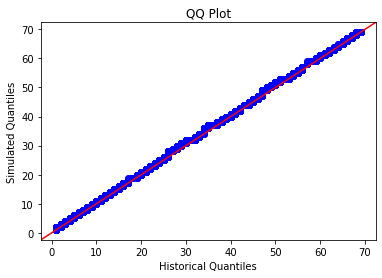

In [136]:
sm.qqplot_2samples(np.array(historical_flat), np.array(simulated_flat), line='45')
plt.xlabel('Historical Quantiles')
plt.ylabel('Simulated Quantiles')
plt.title('QQ Plot')
plt.show()

In [137]:
#The historical draws line up nearly perfect to that of the simulated draws
#Here, we're able to prove that the lottery is fair and that there's no arbitrage opportunity

# Powerball Number

In [138]:
#However, does the same hold for the powerball number?

In [167]:
newest_hist['Powerball'] = newest_hist['Powerball'].astype('int')

In [168]:
historical_draws = [newest_hist['Powerball'].dropna()]

In [169]:
simulated_draws = sorted([np.random.randint(1, 26) for i in range(len(newest_hist['Powerball'].dropna()))])

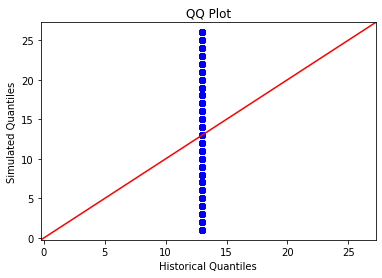

In [170]:
sm.qqplot_2samples(np.array(historical_draws), np.array(simulated_draws), line='45')
plt.xlabel('Historical Quantiles')
plt.ylabel('Simulated Quantiles')
plt.title('QQ Plot')
plt.show()